<a href="https://colab.research.google.com/github/dolmani38/nash_loss/blob/master/A_Continuos_Optimization_Algorithm_based_on_Fictitious_Play_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import numpy as np


# 주어진 player의 수, strategy의 영역, strategy의 개수에 의해 
# 전체 pure strategy와 mixed strategy를 생성한다.

def make_strategy(number_of_player=10,strategy_range=[-20,20],number_of_strategy=20,resolution=1):
    """
    [[[pure,mixed]... ~ number_of_strategy]... ~ number_of_player ]
    .shape = (number_of_player,number_of_strategy,2 (pure,mixed))
    """
    def non_duplicate_randrange(l,h,r,c):
        lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
        while (not len(lst[:,0]) == len(set(lst[:,0]))):
            lst = np.asarray([[random.randrange(l*1/r,h*1/r) * r,1/c] for i in range(c)])
        return lst    
    
    S = [non_duplicate_randrange(strategy_range[0],strategy_range[1],resolution,number_of_strategy) for x in range(number_of_player)]
    return np.asarray(S, dtype=np.float64)


#S에서 player들에 대한 전략을 선택 한다.
#선택은 mixed strategy의 확율에 의해..
def choice_strategies(strategy_matrix):
    return np.asarray([random.choices(population=strategy_matrix[i,:,0],weights=strategy_matrix[i,:,1],k=1) for i in range(strategy_matrix.shape[0])]).reshape(strategy_matrix.shape[0])



In [2]:
#Step1-1
#모든 player의 pure strategy와, mixed strategy의 생성 & 확인
# S에 해당.
strategy_matrix = make_strategy(10,[-20,20],20,1)
strategy_matrix

array([[[  9.  ,   0.05],
        [-13.  ,   0.05],
        [ 16.  ,   0.05],
        [ -8.  ,   0.05],
        [ -2.  ,   0.05],
        [  8.  ,   0.05],
        [ 17.  ,   0.05],
        [-19.  ,   0.05],
        [  0.  ,   0.05],
        [ -1.  ,   0.05],
        [-16.  ,   0.05],
        [ -9.  ,   0.05],
        [ -6.  ,   0.05],
        [ -3.  ,   0.05],
        [  4.  ,   0.05],
        [-20.  ,   0.05],
        [ -4.  ,   0.05],
        [ 10.  ,   0.05],
        [-11.  ,   0.05],
        [ 13.  ,   0.05]],

       [[ 15.  ,   0.05],
        [  7.  ,   0.05],
        [ 19.  ,   0.05],
        [-12.  ,   0.05],
        [ -9.  ,   0.05],
        [-18.  ,   0.05],
        [-20.  ,   0.05],
        [ 18.  ,   0.05],
        [ 13.  ,   0.05],
        [-13.  ,   0.05],
        [ 10.  ,   0.05],
        [-17.  ,   0.05],
        [-15.  ,   0.05],
        [  2.  ,   0.05],
        [  3.  ,   0.05],
        [  0.  ,   0.05],
        [  4.  ,   0.05],
        [-11.  ,   0.05],
        [ 

In [3]:
#Step1-2
#최초 t=1에 해당하는 player의 strategy 선택 & 확인 
t1 = choice_strategies(strategy_matrix)
t1

array([  9.,  13.,  17.,  15.,  -7.,  -3.,  11., -10.,  12.,  14.])

In [4]:
#Step2-1
# player 0의 pure strategy에 대한 (si,Y-i(t)) 생성, 표본 개수 10개
def make_Y_sample(strategy_matrix,player=0,p_strategy=0,sample_count = 10):
    Y_sample = np.asarray([choice_strategies(strategy_matrix) for i in range(sample_count)])
    Y_sample[:,player] = strategy_matrix[player,p_strategy,0]
    return Y_sample


sample_count = 10
#(s0,Y-0(t))
Y0 = np.asarray([make_Y_sample(strategy_matrix,player=0,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])])
print("Shape of Y-0",Y0.shape)
Y0

Shape of Y-0 (20, 10, 10)


array([[[  9., -18.,  -6., ...,  12.,   1.,  -4.],
        [  9.,   4.,   3., ...,  12.,  18.,  15.],
        [  9., -20.,   6., ...,   5.,  15.,  13.],
        ...,
        [  9., -15.,   1., ...,   1.,  -2.,  -5.],
        [  9.,  15., -12., ...,  13., -16.,  -1.],
        [  9., -12.,  15., ...,   0.,  12.,  17.]],

       [[-13., -17., -19., ...,  17.,   1.,  17.],
        [-13., -12., -20., ...,  -7.,   6., -17.],
        [-13.,   2.,  13., ...,  17., -16.,  12.],
        ...,
        [-13.,  18.,  10., ..., -10., -10.,  15.],
        [-13.,  -9.,  10., ...,   7.,   1.,  -4.],
        [-13.,   7., -12., ...,  18., -15.,  -8.]],

       [[ 16.,  19., -15., ...,   0.,   6.,   4.],
        [ 16.,   0.,  17., ..., -17.,  -2.,  18.],
        [ 16., -15.,   3., ..., -16., -15.,  -9.],
        ...,
        [ 16., -18.,  13., ...,   2., -15.,  18.],
        [ 16.,   4., -12., ...,  -3.,  -3.,  12.],
        [ 16., -20., -20., ...,  18.,  12.,  16.]],

       ...,

       [[ 10., -18.,  19

In [5]:
#Step2-2
#모든 player에 대한 (si,Y-i(t))의 생성

si_Y_i = np.asarray([[make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
# player_count,pure_strategy_count,sample_count,strategy_count
print("Shape of si_Y_i",si_Y_i.shape)
si_Y_i


Shape of si_Y_i (10, 20, 10, 10)


array([[[[  9.,   2.,  10., ..., -12.,  15.,  18.],
         [  9., -12.,  17., ...,  13.,   6.,  14.],
         [  9.,  13., -15., ..., -12.,   6.,   2.],
         ...,
         [  9.,  16.,  13., ...,   4., -19.,   2.],
         [  9., -15.,  -7., ...,  -3.,   2.,   4.],
         [  9., -13.,  -6., ...,  -1.,   0.,  12.]],

        [[-13.,   0.,   0., ...,   5., -10., -17.],
         [-13.,  16.,  15., ..., -16.,  -4.,  16.],
         [-13.,  10.,  -2., ...,  18.,  -2.,   6.],
         ...,
         [-13., -12.,   1., ...,   4.,   1.,  -5.],
         [-13.,  19.,   6., ..., -17.,  -2., -17.],
         [-13.,  15.,  -1., ...,  12.,   0.,  10.]],

        [[ 16.,  19.,  17., ...,  -1.,  12.,   4.],
         [ 16.,   4., -12., ...,  -2.,   0.,   2.],
         [ 16., -20.,   0., ...,  18.,  12.,  -4.],
         ...,
         [ 16., -17.,  -6., ..., -12.,  18.,  12.],
         [ 16., -13., -20., ...,  17.,  -2.,  10.],
         [ 16.,   2.,   3., ...,  12.,  10.,  12.]],

        ...,

  

In [6]:
#Step2-3
# 목적함수(Test Function)의 정의
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

#Step2-4
# (si,Y-i(t))에서 playe 0의 각 pure_strategy에 대한 sample의 f1 평균값 계산 
def _u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[0,:,:,:]):
    y_m = np.asarray([np.mean([test_function(sample_strategies[j,i,:]) for i in range(sample_strategies.shape[1])]) for j in range(sample_strategies.shape[0])])
    return y_m

y_m = _u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[0,:,:,:])
y_m

array([ -5.37206618,  -3.82715796,  13.17156589,  -3.46456331,
        11.23656834,  -6.33974053,   1.61254908,  -6.09337508,
        -4.65099526,  -0.460656  , -14.72918427, -12.65124974,
         5.44216422,   4.46147419, -14.36405103, -13.72446143,
         2.5935826 ,  -0.11324435,  -8.37704027,  11.01586571])

In [7]:
# t+1에서 player 0의 best response 취득 
# 

br_0 =  strategy_matrix[0,y_m.argmin(),0]
br_0

-16.0

In [8]:
#Step2-5
# t+1에서 모든 player에 대한 best response 취득

br = np.asarray([strategy_matrix[i,_u_si_Y_i(test_function=f1,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
br

array([-16., -17., -19.,   3., -19., -13., -13., -18., -19., -17.])

In [9]:
#Step3-1
# player 0의 t+1에 대한 mixed strategy의 갱신
strategy_matrix[:,:,1] = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
print(strategy_matrix[0,:,1])
t=1
strategy_matrix[0,:,1] = strategy_matrix[0,:,1]+(1/(t+1))*(((strategy_matrix[0,:,0]==br[0]) * 1) - strategy_matrix[0,:,1])
strategy_matrix[0,:,:]

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


array([[  9.   ,   0.025],
       [-13.   ,   0.025],
       [ 16.   ,   0.025],
       [ -8.   ,   0.025],
       [ -2.   ,   0.025],
       [  8.   ,   0.025],
       [ 17.   ,   0.025],
       [-19.   ,   0.025],
       [  0.   ,   0.025],
       [ -1.   ,   0.025],
       [-16.   ,   0.525],
       [ -9.   ,   0.025],
       [ -6.   ,   0.025],
       [ -3.   ,   0.025],
       [  4.   ,   0.025],
       [-20.   ,   0.025],
       [ -4.   ,   0.025],
       [ 10.   ,   0.025],
       [-11.   ,   0.025],
       [ 13.   ,   0.025]])

In [10]:
#Step3-2
#모든 player의 t+1에 대한 mixed strategy의 갱신
t=1
strategy_matrix[:,:,1] = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
for i in range(strategy_matrix.shape[0]):
    strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])

strategy_matrix

array([[[  9.   ,   0.025],
        [-13.   ,   0.025],
        [ 16.   ,   0.025],
        [ -8.   ,   0.025],
        [ -2.   ,   0.025],
        [  8.   ,   0.025],
        [ 17.   ,   0.025],
        [-19.   ,   0.025],
        [  0.   ,   0.025],
        [ -1.   ,   0.025],
        [-16.   ,   0.525],
        [ -9.   ,   0.025],
        [ -6.   ,   0.025],
        [ -3.   ,   0.025],
        [  4.   ,   0.025],
        [-20.   ,   0.025],
        [ -4.   ,   0.025],
        [ 10.   ,   0.025],
        [-11.   ,   0.025],
        [ 13.   ,   0.025]],

       [[ 15.   ,   0.025],
        [  7.   ,   0.025],
        [ 19.   ,   0.025],
        [-12.   ,   0.025],
        [ -9.   ,   0.025],
        [-18.   ,   0.025],
        [-20.   ,   0.025],
        [ 18.   ,   0.025],
        [ 13.   ,   0.025],
        [-13.   ,   0.025],
        [ 10.   ,   0.025],
        [-17.   ,   0.525],
        [-15.   ,   0.025],
        [  2.   ,   0.025],
        [  3.   ,   0.025],
        [  0.   , 

In [11]:
#Step3-3
#mixed strategy의 갱신 후, 각 player의 strategy 취득
t2 = choice_strategies(strategy_matrix)
t2

array([-16., -17., -19.,   3.,  -4.,   4., -13., -18.,   2.,  16.])

In [12]:
#Step3-4
#이때의 f1의 값
f1(t2)

-58.7622863311492

In [0]:
#Step4
#t<-t+1로 두고 Step2와 Step3의 t=N회 반복  : 전체 최적화 알고리즘

def continuos_optimization_based_on_play_theory(object_function=f1,
                                                player_count=10,
                                                strategy_range=[-20,20],
                                                number_of_strategies = 20,
                                                sample_count = 10,
                                                epoch = 100,
                                                resolution=1):
    strategy_matrix = make_strategy(player_count,strategy_range,number_of_strategies,resolution)
    history = []
    for t in range(1,epoch+1):
        #Sample strategy 추출
        si_Y_i = np.asarray([[make_Y_sample(strategy_matrix,player=j,p_strategy=i,sample_count = sample_count) for i in range(strategy_matrix.shape[1])] for j in range(strategy_matrix.shape[0])])
        #시행에 대한 best response 추출
        br = np.asarray([strategy_matrix[i,_u_si_Y_i(test_function=object_function,sample_strategies = si_Y_i[i,:,:,:]).argmin(),0] for i in range(strategy_matrix.shape[0])])
        #mixed strategy의 갱신
        for i in range(strategy_matrix.shape[0]):
            strategy_matrix[i,:,1] = strategy_matrix[i,:,1]+(1/(t+1))*(((strategy_matrix[i,:,0]==br[i]) * 1) - strategy_matrix[i,:,1])
        #다음 strategy 추출
        s = choice_strategies(strategy_matrix)
        # 목적함수의 값 산출
        mv = object_function(s)
        print("\r{}/{} object_function({})={}               ".format(t,epoch,s,mv), end="", flush=True)
        history.append(mv)
    return s,history    

100/100 object_function([-20. -20. -15. -20. -20. -19. -19. -19. -16. -20.])=-172.73090459220427               

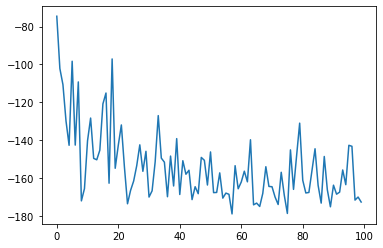

In [14]:
# 실험1
import matplotlib.pyplot as plt
# 논문에서 f1에 해당하는 함수
def f1(player_strategies):
    y = - np.sum(player_strategies* np.sin(np.lib.scimath.sqrt(np.abs(player_strategies))))
    return y

player_count = 10
strategy_range=[-20,20]
number_of_strategies = 20
sample_count = 10
epoch = 100
resolution = 1

s,history = continuos_optimization_based_on_play_theory(object_function=f1,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()

100/100 object_function([-1.  2.  0.  5. -1. -1.  3.  4. -1.  1.])=59.0               

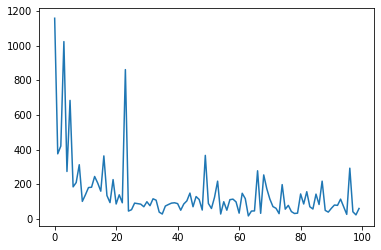

In [15]:
# 실험2
# 논문에서 f2에 해당하는 함수
def f2(player_strategies):
    y = np.sum(player_strategies*player_strategies - 10 * np.cos(2*np.pi*player_strategies)+10)
    return y

s,history = continuos_optimization_based_on_play_theory(object_function=f2,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()


100/100 object_function([ 10.  -5.   2.  -4.  -8. -16. -14.   1.   9.   9.])=256.0               

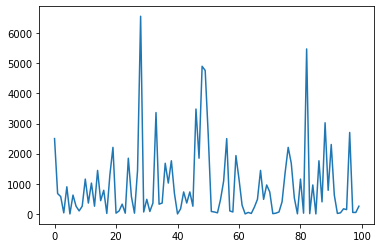

In [16]:
# 실험3
# 논문에서 f3에 해당하는 함수
def f3(player_strategies):
    y = np.sum(np.sum(player_strategies)**2)
    return y

s,history = continuos_optimization_based_on_play_theory(object_function=f3,
                                                        player_count=player_count,
                                                        strategy_range=strategy_range,
                                                        number_of_strategies=number_of_strategies,
                                                        sample_count=sample_count,
                                                        epoch=epoch,
                                                        resolution=resolution)

plt.plot(history)
plt.show()